In [79]:
#importing libraries
!pip install yfinance
import yfinance as yf
from datetime import datetime

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing kNN libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [80]:
symbol = '2800.HK'
tick = yf.Ticker(symbol)
df = tick.history(start="2017-03-22", end="2022-03-21")
#print the head
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-03-22,24.600000,24.700001,24.500000,24.600000,214529718,0,0
2017-03-23,24.650000,24.750000,24.549999,24.600000,87470254,0,0
2017-03-24,24.700001,24.750000,24.549999,24.700001,144225146,0,0
2017-03-27,24.549999,24.700001,24.450001,24.500000,151651793,0,0
2017-03-28,24.600000,24.650000,24.549999,24.650000,67046507,0,0


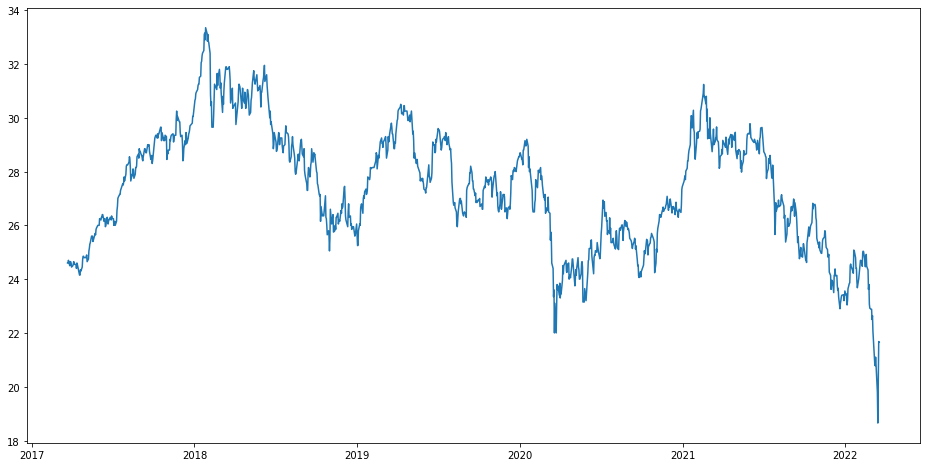

In [81]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [82]:
#creating a separate dataset
df['Date'] = df.index
df['index'] = range(1, len(df) + 1)
df = df.set_index('index')
new_data = df.drop(['Open', 'Dividends' ,'Stock Splits' , 'High',  'Low', 'Volume'], axis=1)

new_data.head()

,Close,Date
index,,
1,24.600000,2017-03-22
2,24.600000,2017-03-23
3,24.700001,2017-03-24
4,24.500000,2017-03-27
5,24.650000,2017-03-28


In [83]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [84]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [85]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

3.044762305413607

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


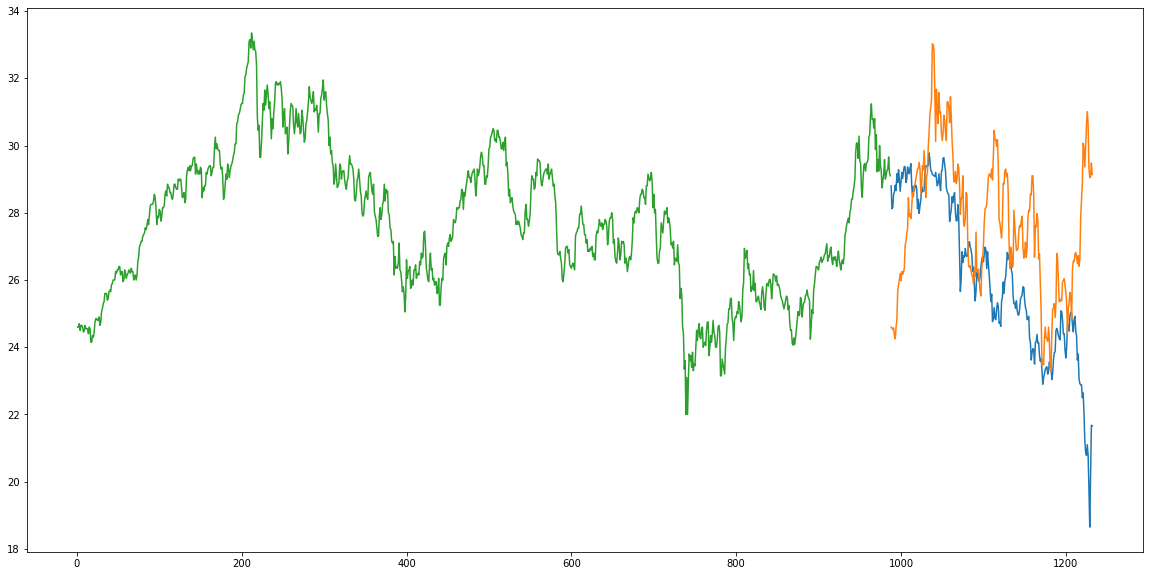

In [86]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])